IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score , davies_bouldin_score 


IMPORTING THE DATA

In [2]:
df = pd.read_csv(r"C:\Users\Pranav\Desktop\prachi\customer segmentation\Mall_Customers.csv",encoding ="unicode_escape")

DATA CLEANING

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

DATA PREPROCESSING

In [6]:
df.drop(columns=['CustomerID'],inplace=True)

In [7]:
#encoding the features
encoder = LabelEncoder()

df['Genre']=encoder.fit_transform(df['Genre'])

In [8]:
#scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [9]:
#elbow method
sum_squares =[]
for i in range(1,11):#trying k from 1-10
    kmeans = KMeans(n_clusters=i , random_state = 42 , n_init = 10)
    kmeans.fit(df_scaled)
    sum_squares.append(kmeans.inertia_)

c:\Users\Pranav\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Pranav\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Pranav\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Pranav\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarn

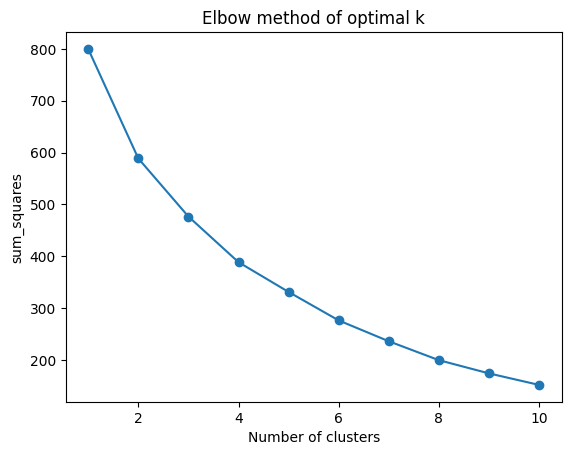

In [10]:
#ploting elbow curve
plt.plot(range(1,11),sum_squares, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sum_squares')
plt.title('Elbow method of optimal k')
plt.show()

In [11]:
# To overcome the OMP_NUM_THREADS warning (causes memory leak when running KMeans)
import os
os.environ['OMP_NUM_THREADS']="1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"

In [12]:
print(type(df_scaled))


<class 'numpy.ndarray'>


In [13]:
df_scaled = pd.DataFrame(df_scaled , columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])


MODEL TRAINING

In [14]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [15]:
#Train k-Means model
k_value = 5

kmeans = KMeans(n_clusters=k_value , random_state=42,n_init=10)
df['Cluster'] = kmeans.fit_predict(df)



c:\Users\Pranav\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


VISUALIZATION

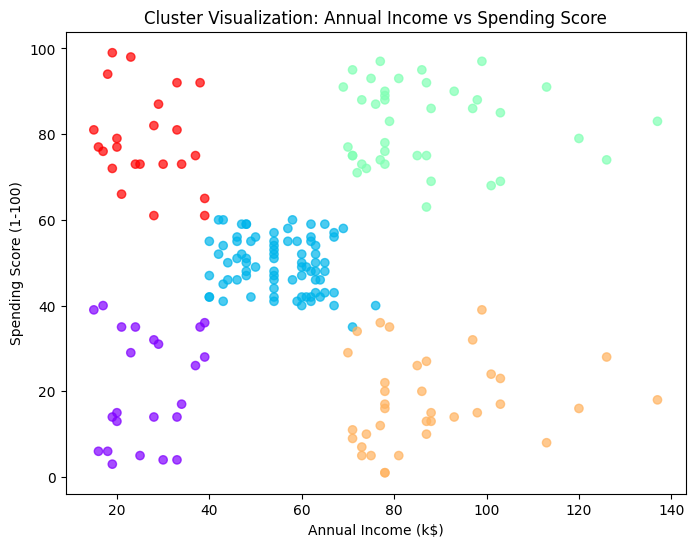

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=kmeans.labels_, cmap='rainbow', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Visualization: Annual Income vs Spending Score')

plt.show()


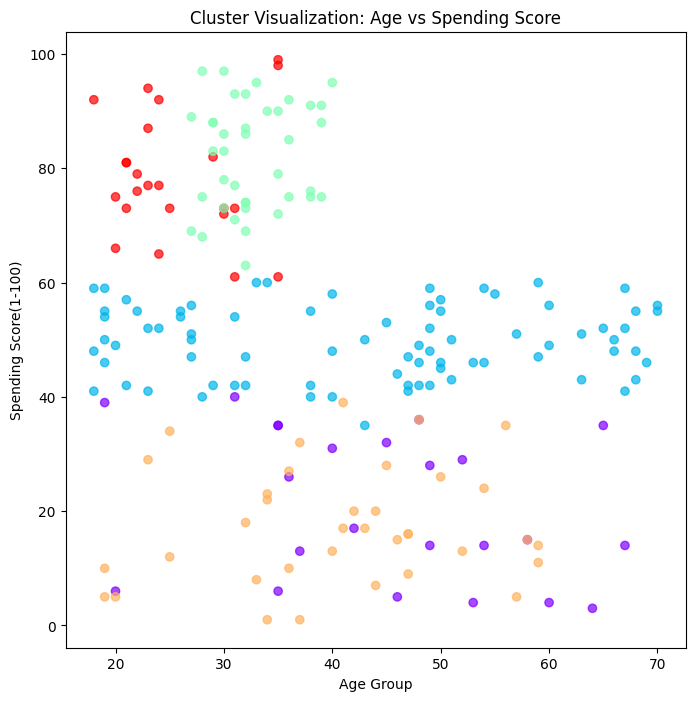

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(df['Age'] , df['Spending Score (1-100)'], c=kmeans.labels_ , cmap='rainbow', alpha = 0.7)
plt.xlabel("Age Group")
plt.ylabel("Spending Score(1-100)")
plt.title("Cluster Visualization: Age vs Spending Score")
plt.show()

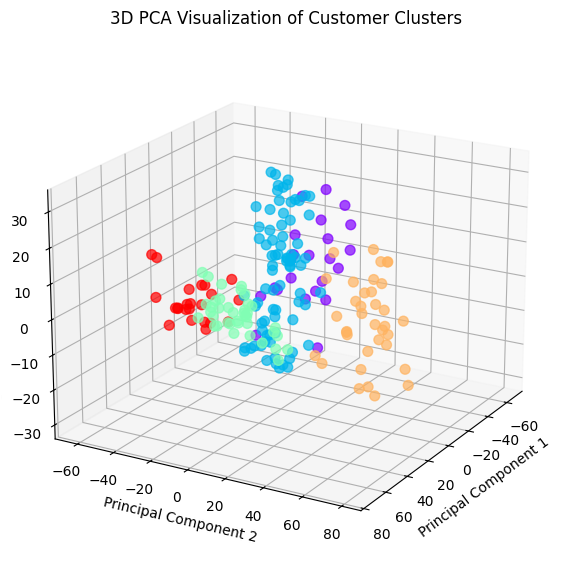

In [18]:
# Assuming df is your original DataFrame
X = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Apply PCA to reduce to 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap='rainbow', s=50, alpha=0.7)

# Labels and titles
ax.set_title('3D PCA Visualization of Customer Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.view_init(elev=20, azim=30) 

plt.show()


In [19]:
print(df['Cluster'].value_counts())



Cluster
1    79
2    39
3    36
0    23
4    23
Name: count, dtype: int64


In [20]:
print(df.groupby('Cluster').mean())


            Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.391304  45.217391           26.304348               20.913043
1        0.417722  43.088608           55.291139               49.569620
2        0.461538  32.692308           86.538462               82.128205
3        0.527778  40.666667           87.750000               17.583333
4        0.391304  25.521739           26.304348               78.565217


INSIGHTS

WHO ARE THE HIGH SPENDING CUSTOMERS?
Customers aged 20-40 have the highest spending scores. This suggests that younger customers are more willing to spend on luxury or premium products.

WHO ARE THE LOW SPENDING CUSTOMERS?
Customers above 40 tend to spend less. They might be more budget-conscious, focusing on necessities rather than luxury.    

ARE THERE ANY SURPRISING PATTERNS?
The drastic drop in spending score after 40 suggests a change in spending habits.This could be due to lifestyle shifts, financial commitments, or changing preferences.    

WHO ARE THE LEAST PROFITABLE CUSTOMERS?
customers with low annual income and low spending score.They engage minimally, making them a lower priority for high-investment marketing efforts.